Ai - odamlarga taqlid qiluvchi kamputerlar(dasturlar)

**Machine Learning (ML)** - Kamputerlarni dasturlamagan holda o'z o'zini o'qitish imkonini berish.

ML ishlatiladi:

• Ko'p qonun-qoidalar va shartlar yozishni talab qiladigan
muammolar

• Klassik usul bilan yechim topib bo'lmaydigan kompleks muammolar

• Doimiy o'zgaruvchan muammolar

• Katta o'Ichamdagi ma'lumotlardan yashirin mazmun va ma'nolarni topishga oid muammolar

In [ ]:
# ML qadamlari:

1.1 Jarayonni tushunish --> savollar berish orqali

1.2 Analitik yondashuv

1) Qaysi Ml turini tanlaymiz -> Supervised \ Unsupervised \ Reinforestment Learning

2) Muammo turi (Algoritm) -> Regression \ Classification \ Clastering

3) Usul -> online \ offline

Model aniqligini baholash

• MAE - Mean Absolute Error (O'rtacha absolyut xatolik)

• RMSE - Root Mean Square Error (O'rtacha kvadrat xatolik)

### Malumotlarni o'rganish

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# DataFrame bilan tanishuv
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info() # Ustunlar va ularning dtype larini ko'rish mumkin | Nan qiymatlar bor yoki yo'qligini ko'rish mumkin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts() # ustundagi takrorlanmas qiymatlarni ko'rish

# Index.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe() # turli statistikalar | Naodatiy qiymatlar bor yo'qligini ko'rish mumkin -> min / max qiymatlar orqali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Grafiklar** orqali malumotlarni tahlil qilish

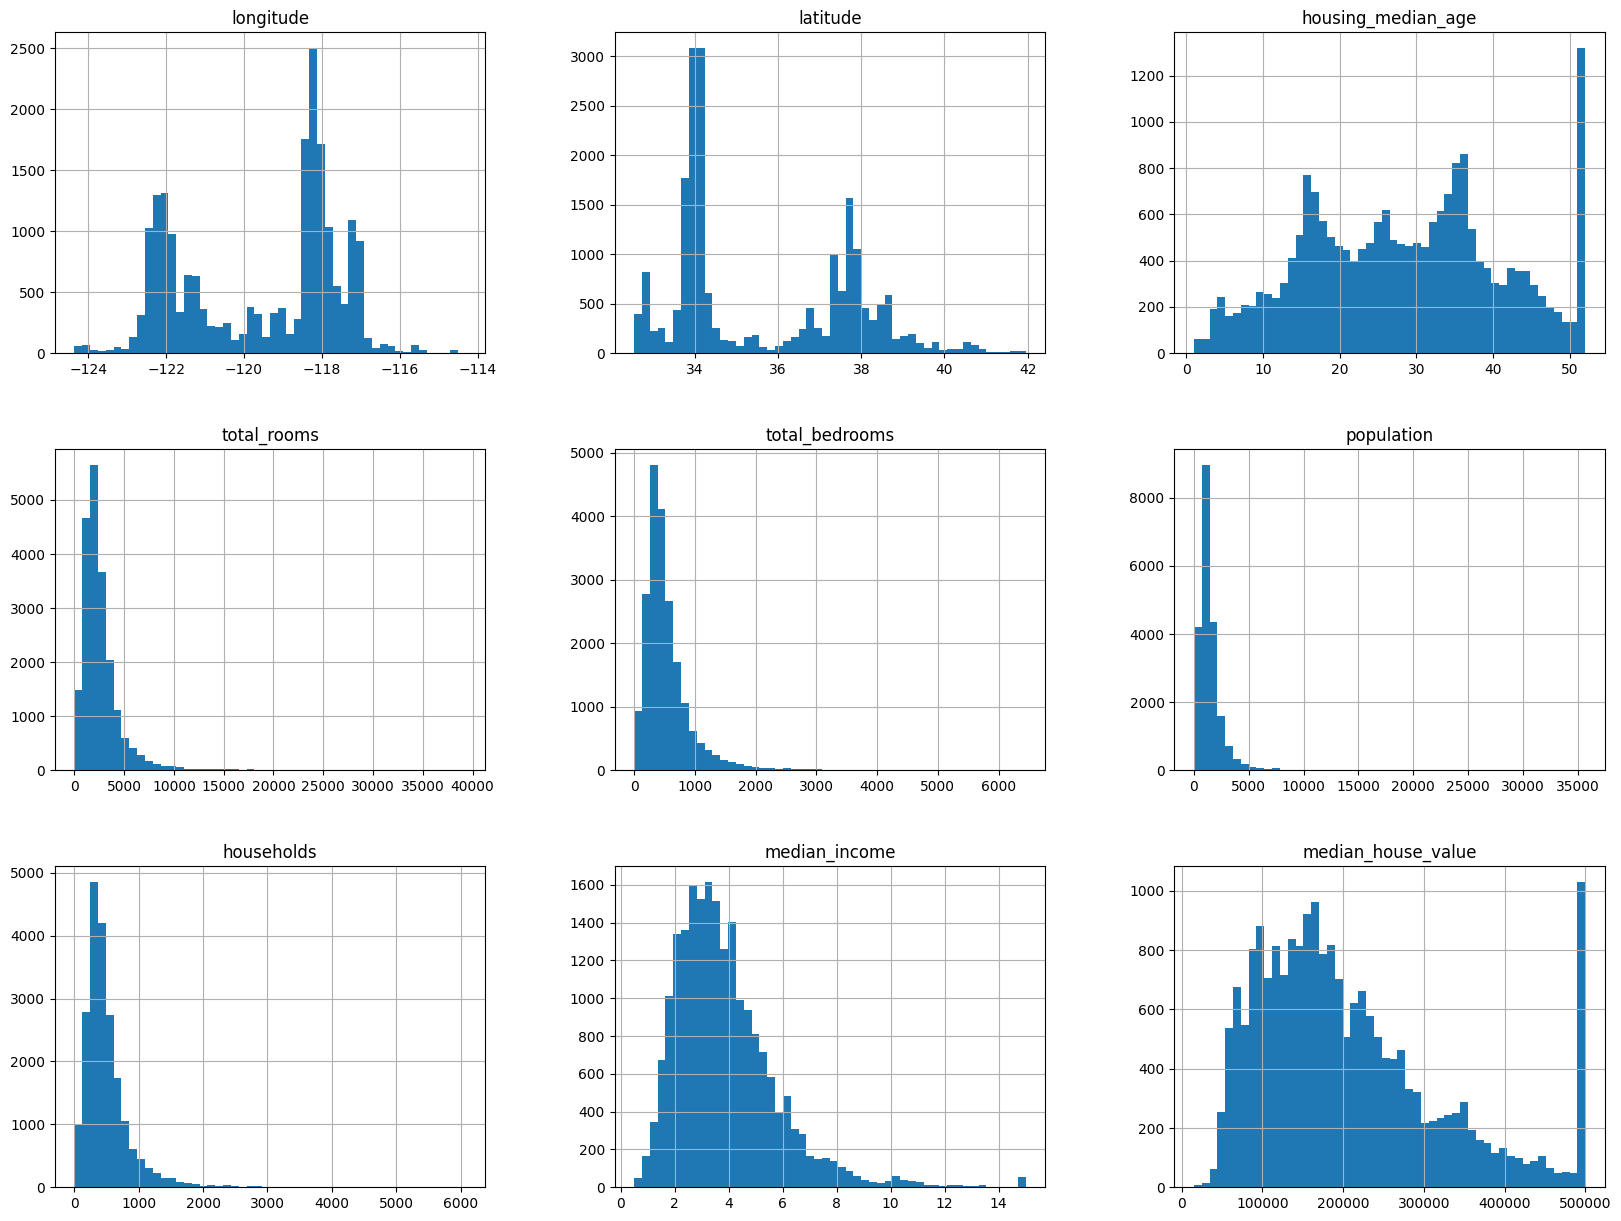

In [8]:
df.hist(bins=50, figsize=(20,15)) # turli xulosalar olish mumkin. | Naodatiy qiymatlar 'housing_median_age'
plt.show()

**Train \ Test \ Validayion** qismlarga ajratish

In [9]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df, test_size=0.2 , random_state=42)

Muvozanatli train / test ga ajratish | biror bir ustun bo'yicha

In [10]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5]) # guruxlash

from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

**Vizualziasiya**

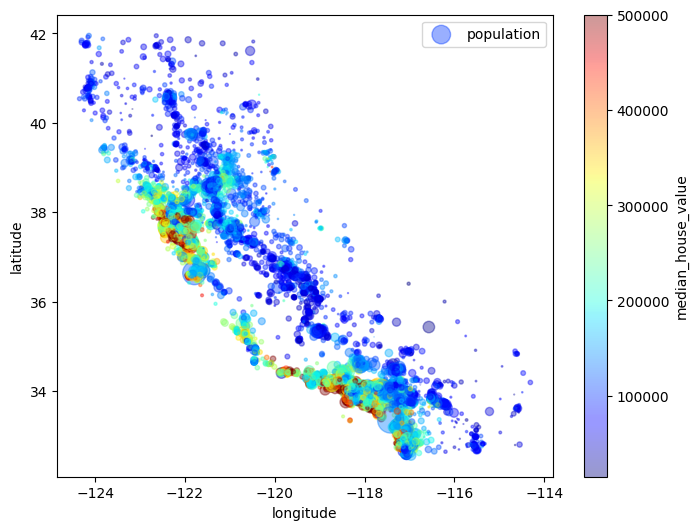

In [12]:
housing = train_set.copy()

housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing['population']/100, # nuqta radiusi aholi soniga qarab o'zgaradi
    label="population",
    c="median_house_value", # nuqta rangi uyning narxiga qarab o'zgaradi
    cmap="jet", # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar=True,
    figsize=(8,6)
)
plt.show()

# Okeanga yaqin joylarda uylarning ham narxi qimmatroq
# Okeanga yaqin hududlarda aholi zichroq

**Korrelyasiya**

In [26]:
housing['ocean_proximity'] = housing_yield
housing.drop('ocean_proximity', axis=1 , inplace=True)

housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
dtype: float64

In [29]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


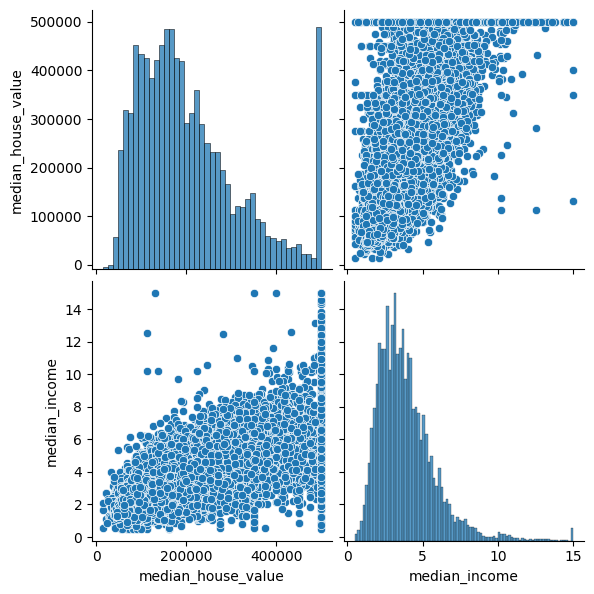

In [31]:
cols = ['median_house_value','median_income']
sns.pairplot(housing[cols], height=3) # juft qilib chiqaradi
plt.show()

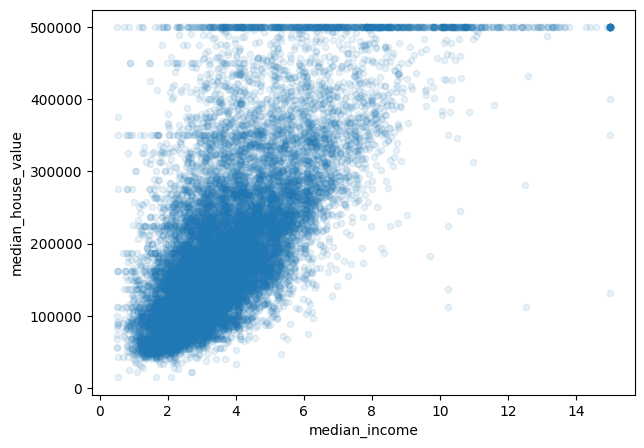

In [33]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(7,5))
plt.show()

**Yangi parametrlar yaratish**

In [34]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # yangi ustun

housing.corrwith(housing['median_house_value']).sort_values(ascending=False) # manfiy bog'liklik

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
bedrooms_per_room    -0.257419
dtype: float64

### ***Ma'lumotlarni Machine Learning uchun tayyorlash***

In [2]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)

# train test setga ajratish
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

#javobni ajratib olish
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

**Tozalash**

In [3]:
# 1-variant. Qatorlarni tashlab yuborish
housing.dropna(subset=['total_bedrooms']) # inplace=True

# 2-variant. Ustunni tashlab yuborish
housing.drop("total_bedrooms", axis=1)

# 3-variant. Median qiymat bilan to'ldirish
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

14196     627.0
8267      787.0
17445     331.0
14265     367.0
2271      431.0
          ...  
11284     201.0
11964     570.0
5390      569.0
860       597.0
15795    1315.0
Name: total_bedrooms, Length: 16512, dtype: float64

**SimpleImputer**

In [4]:
# SimpleImputer klassini chaqiramiz
from sklearn.impute import SimpleImputer
# SimpleImputer klassidan yangi obyekt yaratamiz va NaN qiymatlarni median qiymat bilan to'ldirishni ko'rsatamiz
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1) # matnli ustunlarni tashlab yuborish
imputer.fit(housing_num) # median qiymatlarni hisoblash
imputer.statistics_ # hisoblangan median qiymatlarni ko'rish
X = imputer.transform(housing_num) # hisoblangan median qiymatlar bilan to'ldirish

X = imputer.fit_transform(housing_num) # birdaniga bajarish

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index) # np.array dan Df ga o'tkazish

**Matnli ustunlarni shakl almashtirish**


In [5]:
housing_cat = housing[['ocean_proximity']]

from sklearn.preprocessing import OrdinalEncoder # 1- usul OrdinalEncoder -> Har bir matnni son bilan almashtirish.
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

**OneHotEncoder** - usuli yordamida har bir noyob qiymat alohida ustunga aylanadi va mos keluvchi ustunga 1, qolganlariga 0 qo'yiladi

In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

# pd.get_dummies(housing['ocean_proximity']) # OneHotEncoder bilan bir xil vazifani bajaradi va DF qaytaradi

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**3.3 Transfomer**

**Estimator** - tahmin qiluvchi (baholovchi) funksiyalar. Bunday obyektlar .fit() metodiga ega bo'ladi, bu metod berilgan ma'lumotlardan qandaydur qiymatni hisoblaydi.

**Transformer** - ham tahmin qilib ham ma'lumotga ishlov beruvchi obyekt. Bunday obyektlar .fit_transform() metodiga ega bo'ladi, ya'ni avval qandaydur qiymatnbi hisoblaydi, keyin esa hisoblashni ma'lumotlarga qo'llaydi.

**Predictor** - bashorat qiluvchi obyektlar. Bunday obyektlar .predict() metodiga ega bo'ladi. Ular biz bergan ma'lumotlar asosida bashoratlar qaytaradi.

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

# bizga kerak ustunlar indekslari
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: # add_bedrooms_per_room ustuni ixtiyoriy bo'ladi
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

### 3.4 Standartizasiya va normalizasiya

3.4.1 Min-max scaling

In [10]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
min_mix_scaler = MinMaxScaler()

min_mix_scaler.fit_transform(housing_num)

array([[0.72908367, 0.01702128, 0.62745098, ..., 0.06437961, 0.10228581,
        0.19032151],
       [0.61653386, 0.12978723, 0.94117647, ..., 0.0367443 , 0.12415721,
        0.22845202],
       [0.38545817, 0.22446809, 0.05882353, ..., 0.02556125, 0.05508962,
        0.25216204],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.04913254, 0.08649893,
        0.16789424],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.04972112, 0.09176122,
        0.35994676],
       [0.19223108, 0.55531915, 1.        , ..., 0.07332044, 0.20407828,
        0.14314285]])

3.4.2 **Standard Scaler - standartlash**

In [11]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

.

## **Pipeline - konveyer**

In [6]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi

# Onlayn dataset joylashgan manzilini ko'rsatamiaz
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"].copy()

X_num = housing.drop("ocean_proximity", axis=1)

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
# bizga kerak ustunlar indekslari
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: # add_bedrooms_per_room ustuni ixtiyoriy bo'ladi
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

Pipeline yaratamiz

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# sonlar bilan ishlovchi pipeline

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room = True)),
          ('std_scaler', StandardScaler())
])

In [12]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

X_prepared = full_pipeline.fit_transform(X_train)

**Linear Regression - Chiziqli regressiya**

In [13]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_prepared, y)

LinearRegression()

In [15]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
# pipelinedan o'tkazish
test_data_prepared = full_pipeline.transform(test_data)
# predict qilish
predicted_data = LR_model.predict(test_data_prepared)

pd.DataFrame({'Prognoz':predicted_data, 'Asl baxosi': test_label, "Farq": predicted_data - test_label })

,Prognoz,Asl baxosi,Farq
8583,350680.391683,481500.0,-130819.608317
19452,185759.966006,162100.0,23659.966006
10757,469185.858677,500001.0,-30815.141323
65,135630.165848,78400.0,57230.165848
9883,282744.148035,190000.0,92744.148035


## 5-QADAM. **Modelni baholaymiz**

In [16]:
X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

y_predicted = LR_model.predict(X_test_prepared)

In [17]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

72701.32600762138


**DecisionTree**

In [18]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [19]:
y_predicted = Tree_model.predict(X_test_prepared)

lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

72392.86484567185


**RandomForest**

In [20]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [21]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

50169.34979850059


**Cross-Validation** usuli bilan baholash.

Cross validation uchun ma'lumotlarni train va testga bo'lish shart emas, buni sklearn o'zi qiladi.

In [22]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"].copy()

X_prepared = full_pipeline.transform(X)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

display_scores(LR_rmse_scores)

Scores: [84188.51219065 61197.24357613 86752.24346334 62289.14292385
 80540.40041898 68919.39949642 52503.82940087 90910.07884989
 77674.67507925 53941.60539478]
Mean: 71891.71307941683
Std.dev: 13249.525989444988


## **Modelni saqlash**

**pickle** yordamida saqlash

In [24]:
import pickle

filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

In [25]:
with open(filename, 'rb') as file: # modelni o'qish
    model = pickle.load(file)

**joblib** yordamida saqlash

In [28]:
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename) # pipeline saqlash

['pipeline.jbl']

In [27]:
model = joblib.load(filename) # modelni o'qish